# Understanding Descriptive Statistics

Import the necessary libraries here:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [48]:
def rolling_dice():
    num_rolls = range(1,11)
    results = np.random.randint(1, 7, size=10)
    dict_dice = {"Roll":num_rolls,"Result":results}
    return pd.DataFrame(dict_dice)

df = rolling_dice()
df

,Roll,Result
0,1,4
1,2,5
2,3,3
3,4,4
4,5,1
5,6,5
6,7,6
7,8,5
8,9,4
9,10,1


#### 2.- Plot the results sorted by value.

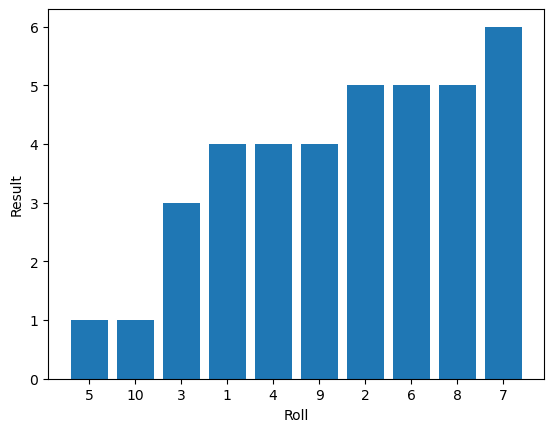

In [49]:
df = df.sort_values(by="Result")

plt.bar(df["Roll"].astype(str),df["Result"])
plt.xlabel("Roll")
plt.ylabel("Result")
plt.show()

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

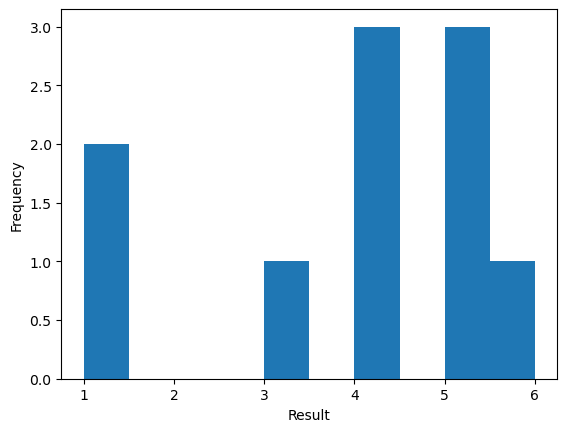

In [50]:
plt.hist(df["Result"])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
The first plot gives us the result of each roll
The second plot gives us the frequency of each result (how many times a value was rolled)
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [51]:
def calculate_mean(x):
    return sum(x)/len(x)

calculate_mean(df["Result"])

3.8

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [52]:
def calculate_freq_dist(x):
    x = list(x)
    return {element:x.count(element) for element in x}

def calculate_mean_freq_dist(freq_dist):
    sum_elements = 0
    for key,value in freq_dist.items():
        sum_elements += int(key)*int(value)
    return sum_elements/sum(freq_dist.values())

freq_dist = calculate_freq_dist(df["Result"])

print(freq_dist) # prints the frequency distribution

calculate_mean_freq_dist(freq_dist) # calculates the mean using the frequency distribution

{1: 2, 3: 1, 4: 3, 5: 3, 6: 1}


3.8

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [53]:
def calculate_median(x):
    num = len(x)
    sorted_x = np.sort(x)
    if num%2 == 0:
        index_median = int(num/2-1) # gives the index of the first element of the pair in the middle
        return (sorted_x[index_median]+sorted_x[index_median+1])/2
    else:
        index_median = int(num/2-0.5) # gives the index of the middle element 
        return sorted_x[index_median] 

calculate_median(df["Result"])


4.0

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [54]:
#Q1, Q2, Q3

def quartiles(x):
    num = len(x)
    sorted_x = np.sort(x)
    q2 = calculate_median(x)
    if num%2 == 0:
        index_median = int(num/2-1) # gives the index of the first element of the pair in the middle
        lower_half = x[:index_median+1]
        upper_half = x[index_median+1:]
    else:
        index_median = int(num/2-0.5) # gives the index of the middle element 
        lower_half = x[:index_median+1]
        upper_half = x[index_median:]
    q1 = calculate_median(lower_half)
    q3 = calculate_median(upper_half)
    
    return q1, q2, q3

quartiles(df["Result"])

(3, 4.0, 5)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

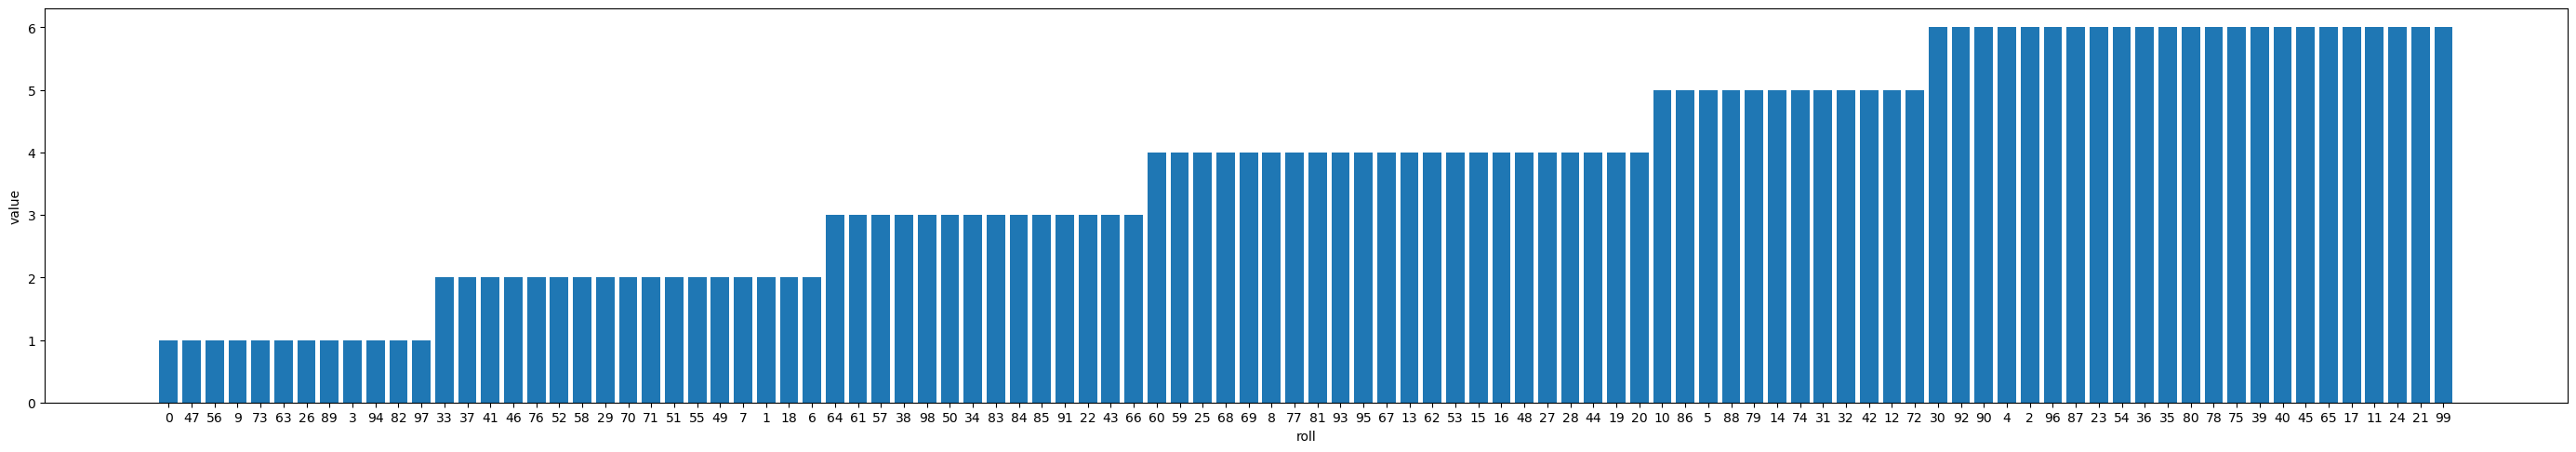

In [55]:
df = pd.read_csv("data/roll_the_dice_hundred.csv", index_col=0)

df = df.sort_values(by="value")

plt.figure(figsize=(35,5.5)) 
plt.bar(df["roll"].astype(str),df["value"])
plt.xlabel("roll")
plt.ylabel("value")
plt.show()

In [ ]:
"""
We can observe that when we roll the dice, it is more frequent to result in the number 4 or 6. It seems 
that the dice is not balanced, as all the values should have the same frequency, but we should have a 
bigger sample to draw conclusions.
However, an histogram would be a better way to plot this data.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [56]:
calculate_mean(df["value"])

3.74

#### 3.- Now, calculate the frequency distribution.


In [57]:
calculate_freq_dist(df["value"])

{1: 12, 2: 17, 3: 14, 4: 22, 5: 12, 6: 23}

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

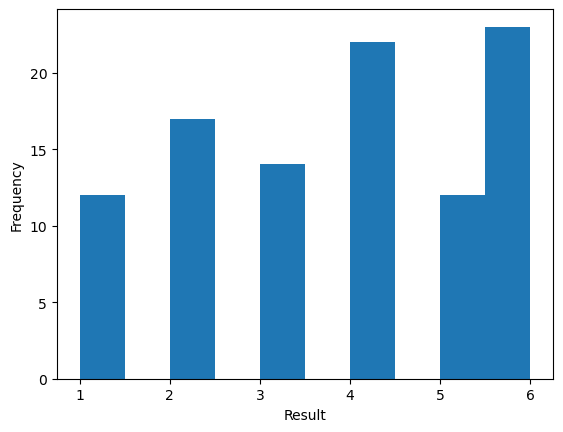

In [58]:
plt.hist(df["value"])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
We can observe the same as in the plot above, although in a much clearer way: when we role the dice, it is more 
frequent to result in the number 4 or 6. It seems that the dice is not balanced, as all the values should have 
the same frequency, but we should have a bigger sample to draw conclusions.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

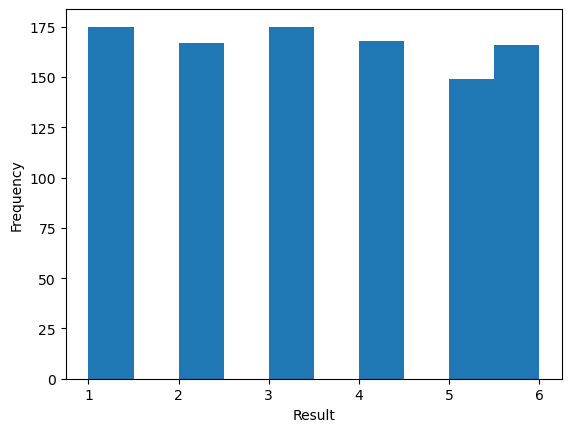

In [59]:
df = pd.read_csv("data/roll_the_dice_thousand.csv", index_col=0)

plt.hist(df["value"])
plt.xlabel("Result")
plt.ylabel("Frequency")
plt.show()

In [ ]:
"""
The frequencies of all the values are identical, which is as expected
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

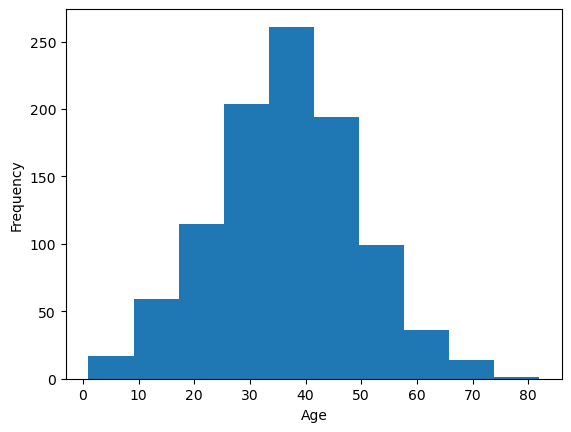

In [60]:
df = pd.read_csv("data/ages_population.csv")

plt.hist(df["observation"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# the mean should be around 40 and the standard deviation should be around 13

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [61]:
print("Mean: ",np.mean(df["observation"]))
print("Standard deviation: ",np.std(df["observation"]))

Mean:  36.56
Standard deviation:  12.81008977329979


In [ ]:
"""
Yes, the values fall inside the guessed ranges
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

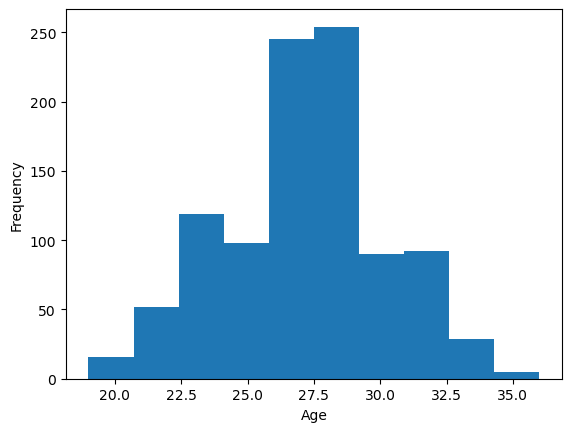

In [62]:
df = pd.read_csv("data/ages_population2.csv")
plt.hist(df["observation"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The poll was made in a neighborhood inhabited by younger people, ranged between 20 and 35 years old. On the 
other hand, the poll in step 1 was made in a neighborhood inhabited by people that ranged between 
0 and 80 years old.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [63]:
print("Mean: ",np.mean(df["observation"]))
print("Standard deviation: ",np.std(df["observation"]))

Mean:  27.155
Standard deviation:  2.9683286543103704


In [ ]:
"""
The mean and the standard deviation confirm that the poll was made to younger people, in a close
range of ages.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

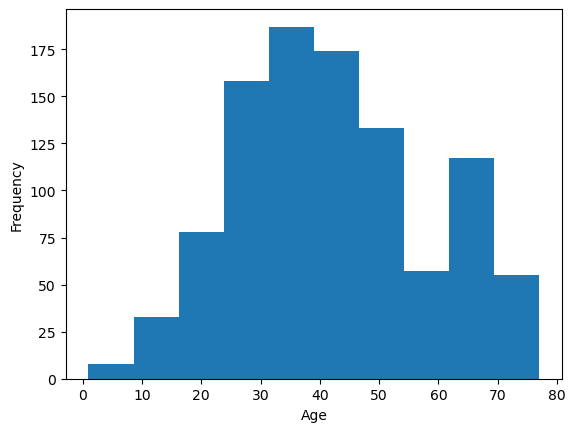

In [64]:
df = pd.read_csv("data/ages_population3.csv")
plt.hist(df["observation"])
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [65]:
print("Mean: ",np.mean(df["observation"]))
print("Standard deviation: ",np.std(df["observation"]))

Mean:  41.989
Standard deviation:  16.136631587788084


In [ ]:
"""
There is a higher frequency of older people, which is driving the mean up. Since the dispersion of ages is 
also bigger, the standard deviation is high.
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [72]:
#Q1, Q2, Q3

q1 = np.quantile(df["observation"],0.25)
print(f"The first quantile is {q1}")

q2 = np.quantile(df["observation"],0.50)
print(f"The second quantile is {q2}")

q3 = np.quantile(df["observation"],0.75)
print(f"The third quantile is {q3}")

q4 = np.quantile(df["observation"],1.00)
print(f"The fourth quantile is {q4}")

print(np.mean(df["observation"]))
print(np.median(df["observation"]))

The first quantile is 30.0
The second quantile is 40.0
The third quantile is 53.0
The fourth quantile is 77.0
41.989
40.0


In [ ]:
"""
The ages are skwed towards the third quantile 
The mean and median are really close
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
I don't know which other percentiles would be useful to give more arguments to my reasoning, besides
the ones we already did
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""